In [1]:
#imports 
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [2]:
data = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv")
data.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [3]:
sample_sub = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv')
sample_sub

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671
...,...,...
25075,56037_2023-06-01,3.817671
25076,56039_2023-06-01,3.817671
25077,56041_2023-06-01,3.817671
25078,56043_2023-06-01,3.817671


In [4]:
test_set = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv")
train_set = pd.read_csv("/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv")

**Lets perform some EDA and feature engineering**
- data cleaning
- exploration
- feature engineering, i.e get month and year etc

In [5]:
data.describe()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,30383.649268,13.813399,14.005379,14.240452,14.631328,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,15162.508374,5.586649,5.630199,5.689780,5.776940,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,1001.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,18177.500000,9.700000,9.900000,10.100000,10.500000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,29176.000000,12.800000,13.000000,13.250000,13.600000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,45080.500000,16.800000,17.100000,17.300000,17.900000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,56045.000000,43.700000,48.000000,45.400000,43.000000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


<AxesSubplot:>

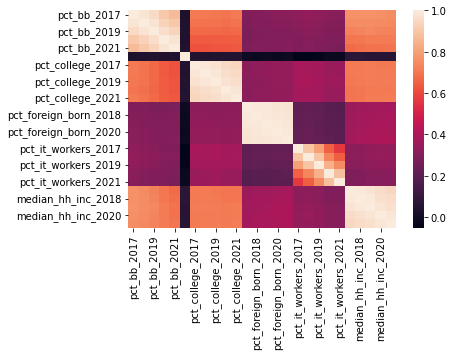

In [6]:
dat_cor = data.corr()
sns.heatmap(dat_cor)

In [7]:
data.columns

Index(['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020',
       'pct_bb_2021', 'cfips', 'pct_college_2017', 'pct_college_2018',
       'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
       'pct_foreign_born_2017', 'pct_foreign_born_2018',
       'pct_foreign_born_2019', 'pct_foreign_born_2020',
       'pct_foreign_born_2021', 'pct_it_workers_2017', 'pct_it_workers_2018',
       'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
       'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019',
       'median_hh_inc_2020', 'median_hh_inc_2021'],
      dtype='object')

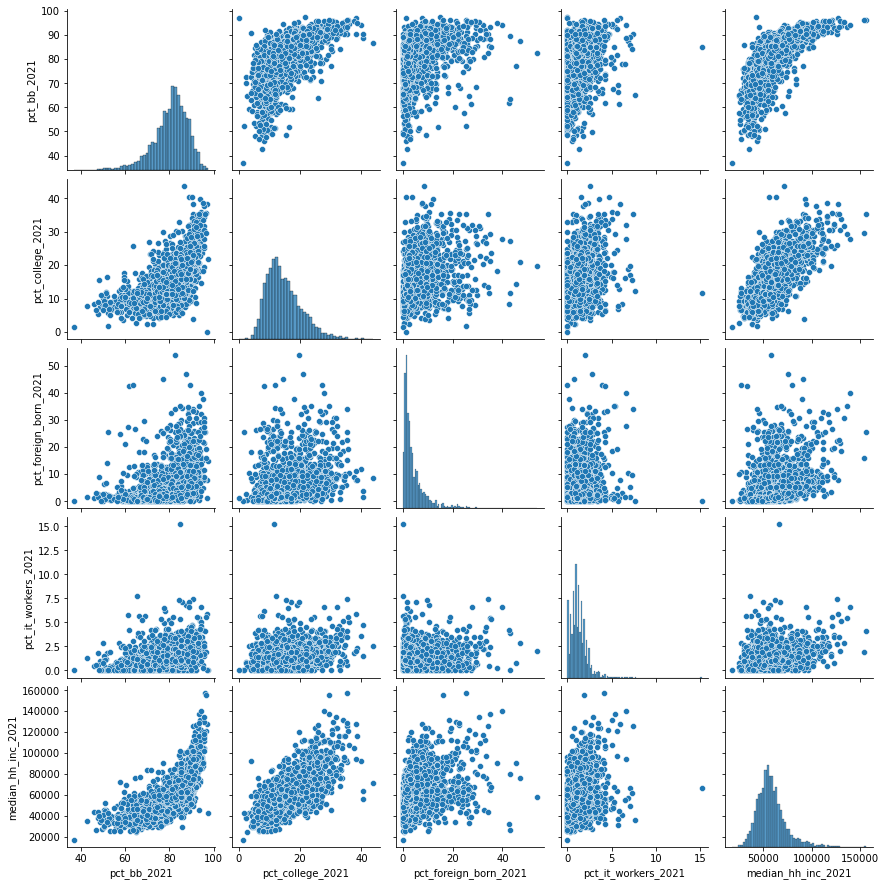

In [8]:
#check latest data - 2021 
cols = ['pct_bb_2021', 'pct_college_2021', 'pct_foreign_born_2021', 'pct_it_workers_2021', 'median_hh_inc_2021']
sns.pairplot(data[cols])

In [9]:
train_set.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [10]:
test_set.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [11]:
train_set.shape #show total cols and rows for training set

(122265, 7)

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [13]:
train_set.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


In [14]:
train_set.isnull().sum() #get counts for null vals

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [15]:
#check for dupes
train_dups = train_set[train_set.duplicated()]
train_dups

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active


In [16]:
train_set.nunique() #check unique vals in dataset

row_id                   122265
cfips                      3135
county                     1871
state                        51
first_day_of_month           39
microbusiness_density     97122
active                    19193
dtype: int64

In [17]:
#create new cols with date and per year
train_set['date'] = pd.to_datetime(train_set['first_day_of_month'])
train_set['year'] = train_set['date'].dt.year

In [18]:
train_set['microbusiness_density'].describe()

count    122265.000000
mean          3.817671
std           4.991087
min           0.000000
25%           1.639344
50%           2.586543
75%           4.519231
max         284.340030
Name: microbusiness_density, dtype: float64

In [19]:
#get mean density per year 
yearly_means = train_set.groupby('year')['microbusiness_density'].mean()
yearly_means

year
2019    3.732905
2020    3.722057
2021    3.841160
2022    3.946603
Name: microbusiness_density, dtype: float64

In [20]:
#check on montly basis
train_set['month'] = train_set['date'].dt.month
monthly_means = train_set.groupby('month')['microbusiness_density'].mean()
monthly_means

month
1     3.767546
2     3.779636
3     3.805977
4     3.831690
5     3.830886
6     3.820389
7     3.851197
8     3.832016
9     3.822233
10    3.857888
11    3.797355
12    3.795525
Name: microbusiness_density, dtype: float64

<AxesSubplot:xlabel='state'>

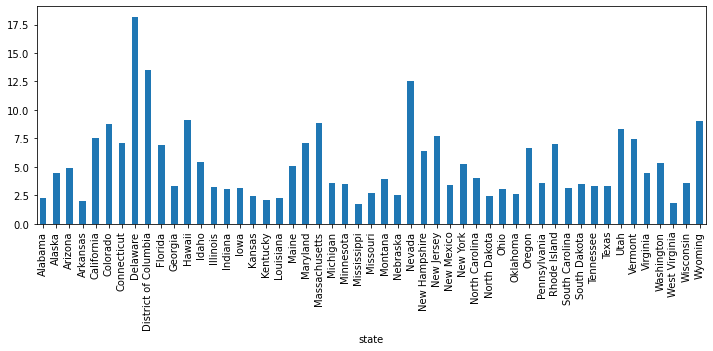

In [21]:
#which state has the largest density mean?

train_set.groupby('state')['microbusiness_density'].mean().plot(kind='bar', figsize = (12, 4))

**Data pre-processing and ML modelling**

In [22]:
#will need to one hot encode features for modelling 
le = LabelEncoder()

get_cat_vars = train_set.select_dtypes(include = 'object').columns
for i in get_cat_vars:
    train_set[i] = le.fit_transform(train_set[i])
    
train_set.reset_index(drop=True, inplace=True)
train_set

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,date,year,month
0,117,1001,82,0,0,3.007682,1249,2019-08-01,2019,8
1,118,1001,82,0,1,2.884870,1198,2019-09-01,2019,9
2,119,1001,82,0,2,3.055843,1269,2019-10-01,2019,10
3,120,1001,82,0,3,2.993233,1243,2019-11-01,2019,11
4,121,1001,82,0,4,2.993233,1243,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...
122260,117190,56045,1793,50,34,1.803249,101,2022-06-01,2022,6
122261,117191,56045,1793,50,35,1.803249,101,2022-07-01,2022,7
122262,117192,56045,1793,50,36,1.785395,100,2022-08-01,2022,8
122263,117193,56045,1793,50,37,1.785395,100,2022-09-01,2022,9


In [23]:
#since this is time series data - lets just use the 2021 data 
train_data = train_set[train_set['date'] < '2022-01-01']
val_data = train_set[train_set['date'] >= '2022-01-01']


#for training lets separate via X and Y training based on month and density

# for training data
X_train = train_data.drop(columns = ['microbusiness_density','date'], axis=1)
y_train = train_data['microbusiness_density']

# for validation data
X_val = val_data.drop(columns = ['microbusiness_density', 'date'], axis=1)
y_val = val_data['microbusiness_density']

X_train

,row_id,cfips,county,state,first_day_of_month,active,year,month
0,117,1001,82,0,0,1249,2019,8
1,118,1001,82,0,1,1198,2019,9
2,119,1001,82,0,2,1269,2019,10
3,120,1001,82,0,3,1243,2019,11
4,121,1001,82,0,4,1243,2019,12
...,...,...,...,...,...,...,...,...
122250,117180,56045,1793,50,24,93,2021,8
122251,117181,56045,1793,50,25,94,2021,9
122252,117182,56045,1793,50,26,93,2021,10
122253,117183,56045,1793,50,27,98,2021,11


In [24]:
#check shape of data 

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

(90915, 8)
(90915,)
(31350, 8)
(31350,)


In [25]:
#instantiate RF regressor for modelling 

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
pred = rf.predict(X_val)
pred

array([3.20617778, 3.22487662, 3.22601473, ..., 1.76961804, 1.76919562,
       1.76919562])

In [27]:
#evaluate - MSE for regression
mean_squared_error(y_val,pred)

4.535933733867775

Lets compare against regular linear regression model


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lm_pred = lr.predict(X_val)
mean_squared_error(y_val,lm_pred)

30.27420526051922

So random forest is definitely the better model based on MSE

Let's also compare a different algorithm - using decision tree

In [30]:
DTReg = DecisionTreeRegressor()
DTReg.fit(X_train, y_train)

DT_preds = DTReg.predict(X_val)

mean_squared_error(y_val,DT_preds)

8.26363523823766

So looks like RF is the better model between LR and DT models
Therefore, we can perform hyperparameter tuning to enhance the performance of our model

**Hyperparameter tuning**
- to improve accuracy of model --> ie max depth of trees, n_estimators etc

In [31]:
def get_hyperparameters_rf(**params):
    """
    function to get hyperparameters for rf model
    """
    model = RandomForestRegressor(**params).fit(X_train,y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    return f'the MSE of training set: {mean_squared_error(y_train,train_pred)} and MSE of val set: {mean_squared_error(y_val,val_pred)}'

In [32]:
get_hyperparameters_rf(max_depth = 40, n_estimators = 100)

'the MSE of training set: 0.130571703040987 and MSE of val set: 4.5224687553909515'